In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install ultralytics -q

In [ ]:
# yolob8 data.zip 압축 풀기

import os
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/kdt_231026/project/data.zip') as target_fle:
    target_fle.extractall('/content/data')


print('test images = ', os.listdir('/content/data'))

test images =  ['valid', 'test', 'train']


In [ ]:
!cat /content/drive/MyDrive/kdt_231026/project/data1/data.yaml

names:
- person
- bicycle
- car
- motorcycle
- bus
- tree_trunk
- traffic_light
- stop
- carrier
- cat
- dog
- movable_signage
- scooter
- stroller
- truck
- wheelchair
- barricade
- bench
- bollard
- chair
- fire_hydrant
- kiosk
- parking_meter
- pole
- potted_plant
- power_controller
- table
- traffic_light_controller
- traffic_sign
nc: 29
test: /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/test/images/
train: /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/train/images/
val: /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/valid/images/


In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd /content/yolov5
!pip install -r requirements.txt

/content/yolov5


In [ ]:
%mkdir /content/yolov5/obstacles
%cd /content/yolov5/obstacles

mkdir: cannot create directory ‘/content/yolov5/obstacles’: File exists
/content/yolov5/obstacles


In [ ]:
!pip install PyYAML -q

In [ ]:
!ls

In [ ]:
from glob import glob

# 이미지들의 주소 리스트로 만들어줌
train_img_list = glob('/content/data/train/images/*.jpg')
valid_img_list = glob('/content/data/valid/images/*.jpg')
test_img_list = glob('/content/data/test/images/*.jpg')

# 리스트를 txt파일로 생성
with open('/content/yolov5/obstacles/train.txt', 'w') as f:
   f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/obstacles/valid.txt', 'w') as f:
   f.write('\n'.join(valid_img_list) + '\n')

with open('/content/yolov5/obstacles/test.txt', 'w') as f:
   f.write('\n'.join(test_img_list) + '\n')

In [ ]:
!cp /content/drive/MyDrive/kdt_231026/project/data1/data.yaml /content/yolov5/obstacles/

In [ ]:
!ls

data.yaml  test.txt  train.txt	valid.txt


In [ ]:
%pwd

'/content/yolov5/obstacles'

In [ ]:
%cat /content/yolov5/obstacles/data.yaml

names:
- person
- bicycle
- car
- motorcycle
- bus
- tree_trunk
- traffic_light
- stop
- carrier
- cat
- dog
- movable_signage
- scooter
- stroller
- truck
- wheelchair
- barricade
- bench
- bollard
- chair
- fire_hydrant
- kiosk
- parking_meter
- pole
- potted_plant
- power_controller
- table
- traffic_light_controller
- traffic_sign
nc: 29
test: /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/test/images/
train: /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/train/images/
val: /content/drive/MyDrive/KITA_1026/project/ocr/obstacles_data/valid/images/


In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/obstacles/data.yaml
names:
- person
- bicycle
- car
- motorcycle
- bus
- tree_trunk
- traffic_light
- stop
- carrier
- cat
- dog
- movable_signage
- scooter
- stroller
- truck
- wheelchair
- barricade
- bench
- bollard
- chair
- fire_hydrant
- kiosk
- parking_meter
- pole
- potted_plant
- power_controller
- table
- traffic_light_controller
- traffic_sign
nc: 29
test: /content/data/test/images/
train: /content/data/train/images/
val: /content/data/valid/images/

In [ ]:
%cat /content/yolov5/obstacles/data.yaml

names:
- person
- bicycle
- car
- motorcycle
- bus
- tree_trunk
- traffic_light
- stop
- carrier
- cat
- dog
- movable_signage
- scooter
- stroller
- truck
- wheelchair
- barricade
- bench
- bollard
- chair
- fire_hydrant
- kiosk
- parking_meter
- pole
- potted_plant
- power_controller
- table
- traffic_light_controller
- traffic_sign
nc: 29
test: /content/data/test/images/
train: /content/data/train/images/
val: /content/data/valid/images/


In [ ]:
import yaml
with open('/content/yolov5/obstacles/data.yaml', 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])
num_classes

'29'

In [ ]:
print(len(train_img_list), len(valid_img_list), len(test_img_list))

9008 1127 1126


In [ ]:
%cat /content/yolov5/models/yolov5n.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.25 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [ ]:
{num_classes}

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5n.yaml
# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: {num_classes} # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.25 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]

In [ ]:
%cat /content/yolov5/models/custom_yolov5n.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 29 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.25 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov5n.pt') # load a pretrained YOLOv8n detection model

PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 5.27M/5.27M [00:00<00:00, 20.1MB/s]


In [ ]:
# 53분? 소요 n모델
%%time
%cd /content/yolov5
!python train.py --imgsz 1024 --batch-size 32 --patience 10 --epochs 20 --data /content/yolov5/obstacles/data.yaml --cfg ./models/custom_yolov5n.yaml --weights '' --name sc_results --cache

/content/yolov5
2024-04-08 08:16:54.387017: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 08:16:54.387080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 08:16:54.388588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=./models/custom_yolov5n.yaml, data=/content/yolov5/obstacles/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weight

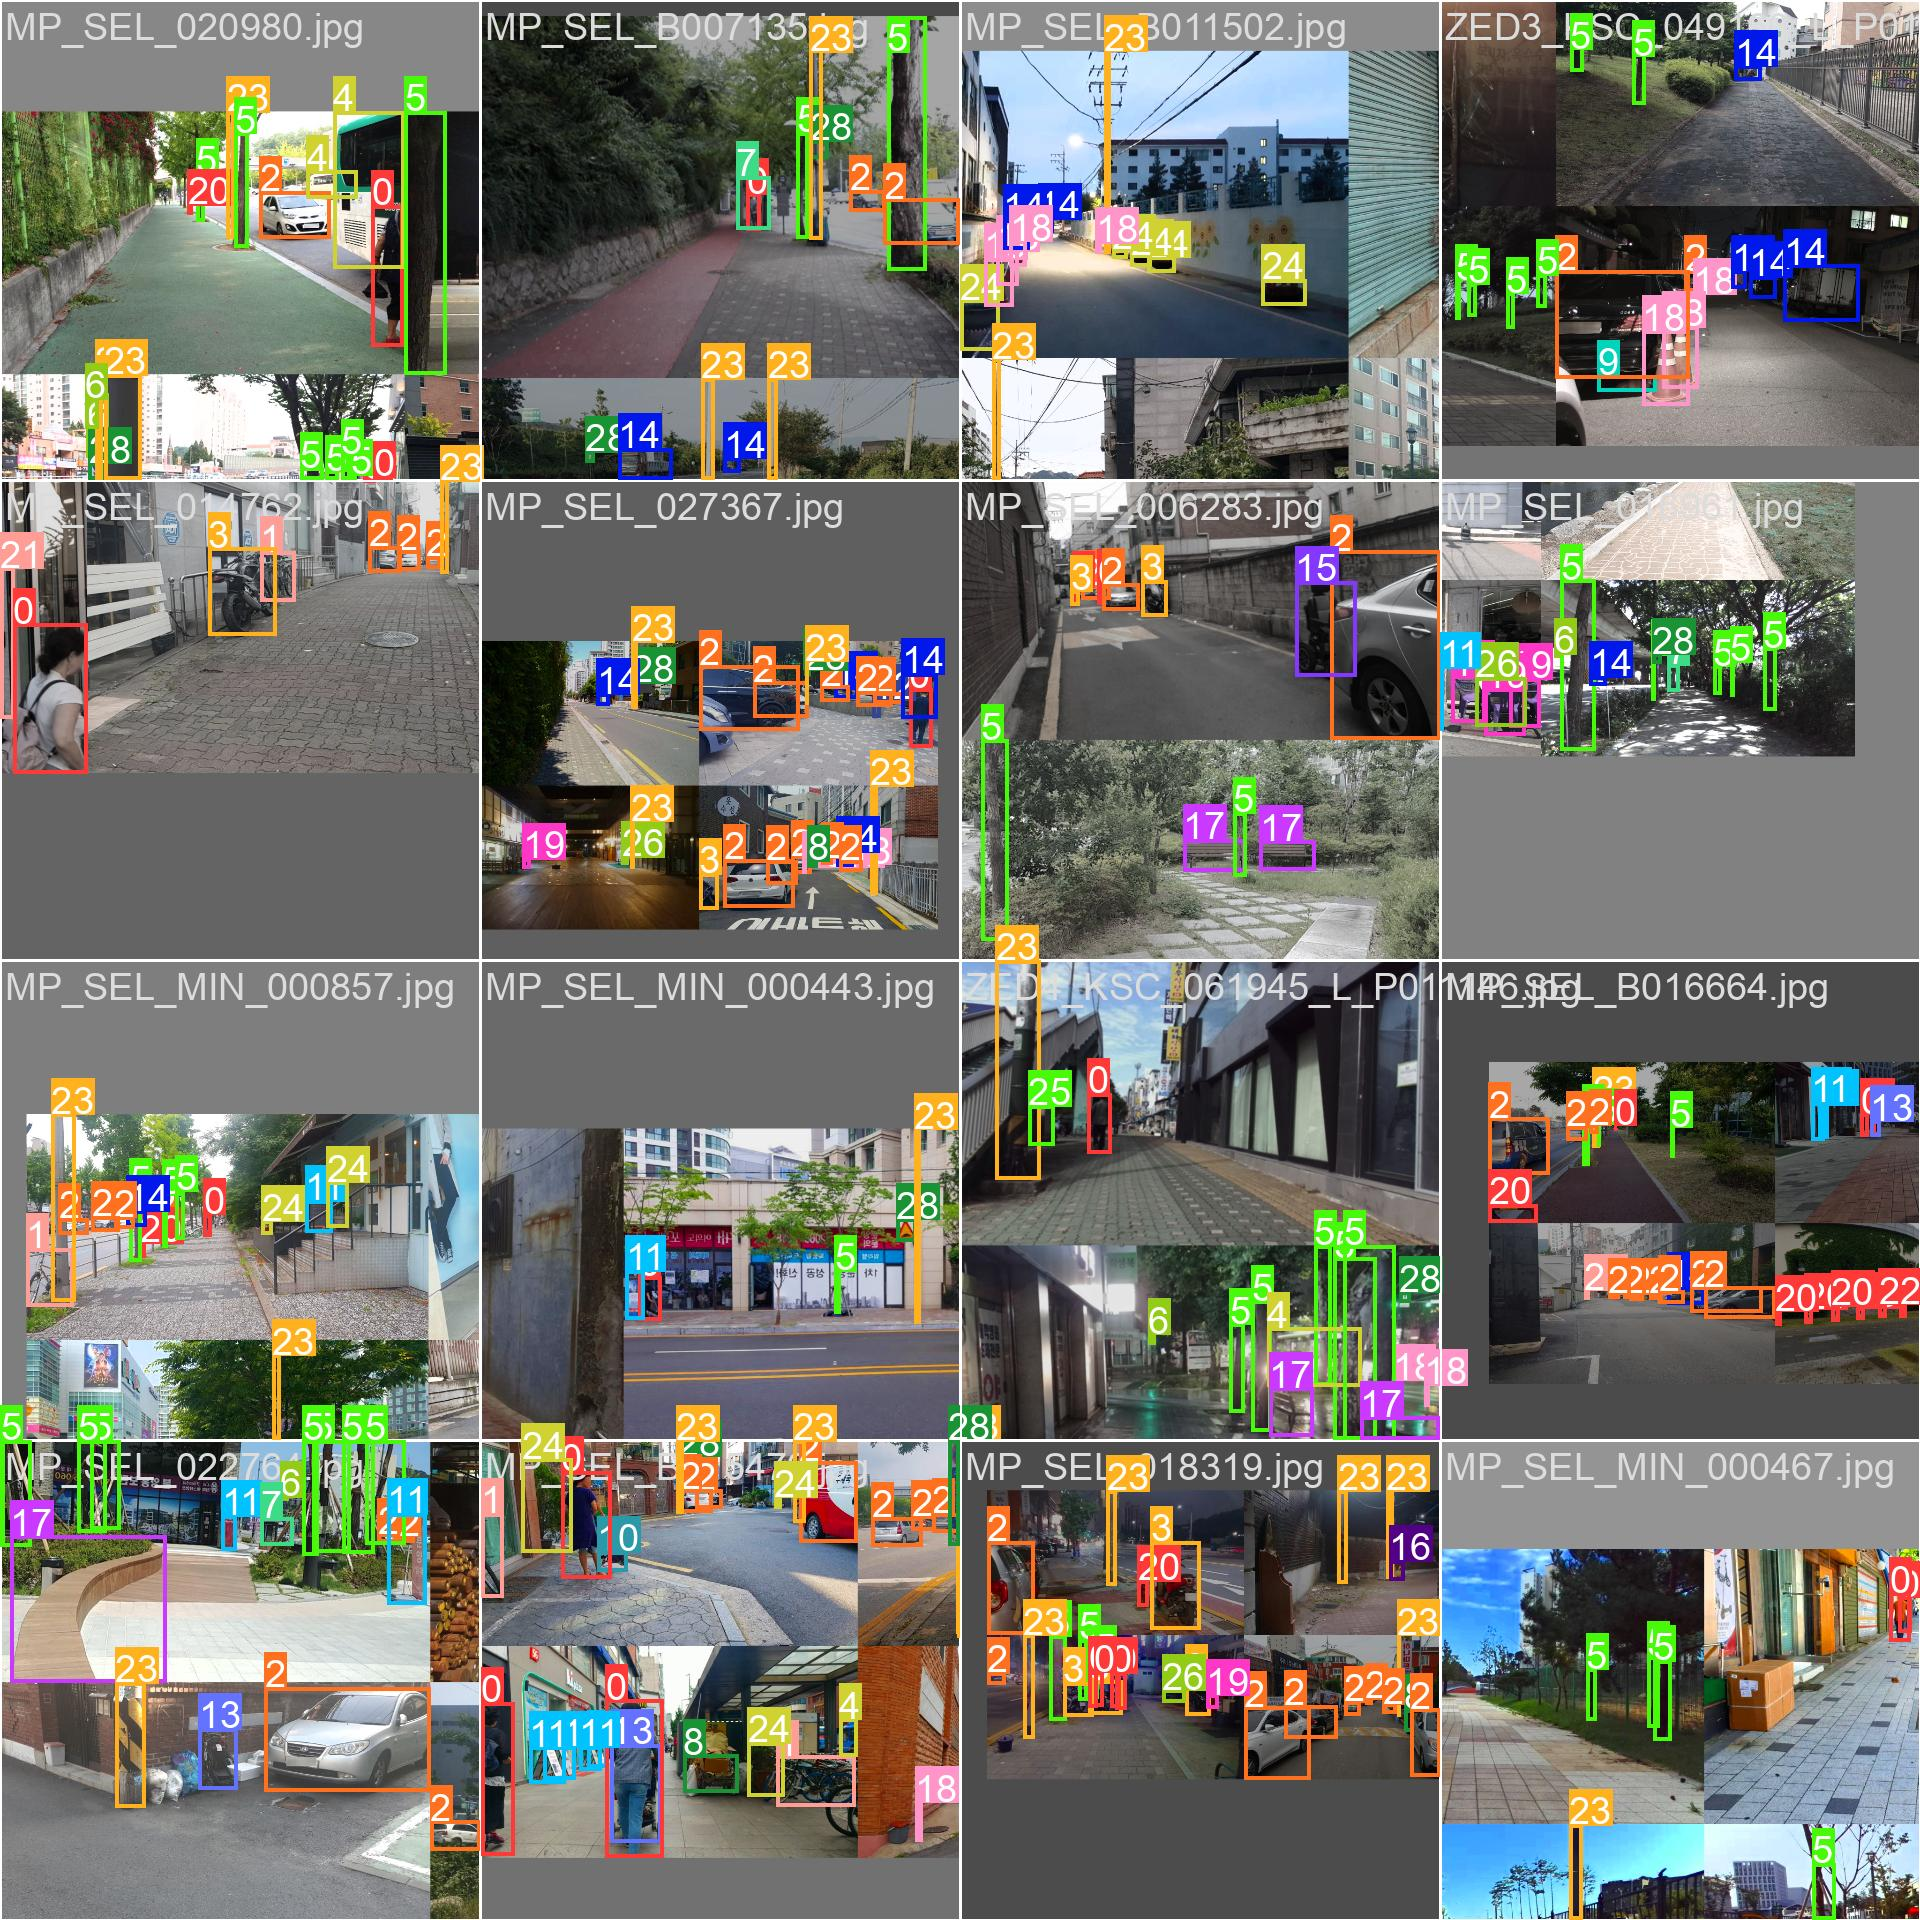

In [ ]:
from PIL import Image
from IPython.display import Image, clear_output

Image(filename='/content/yolov5/runs/train/sc_results/train_batch0.jpg',width=1000)

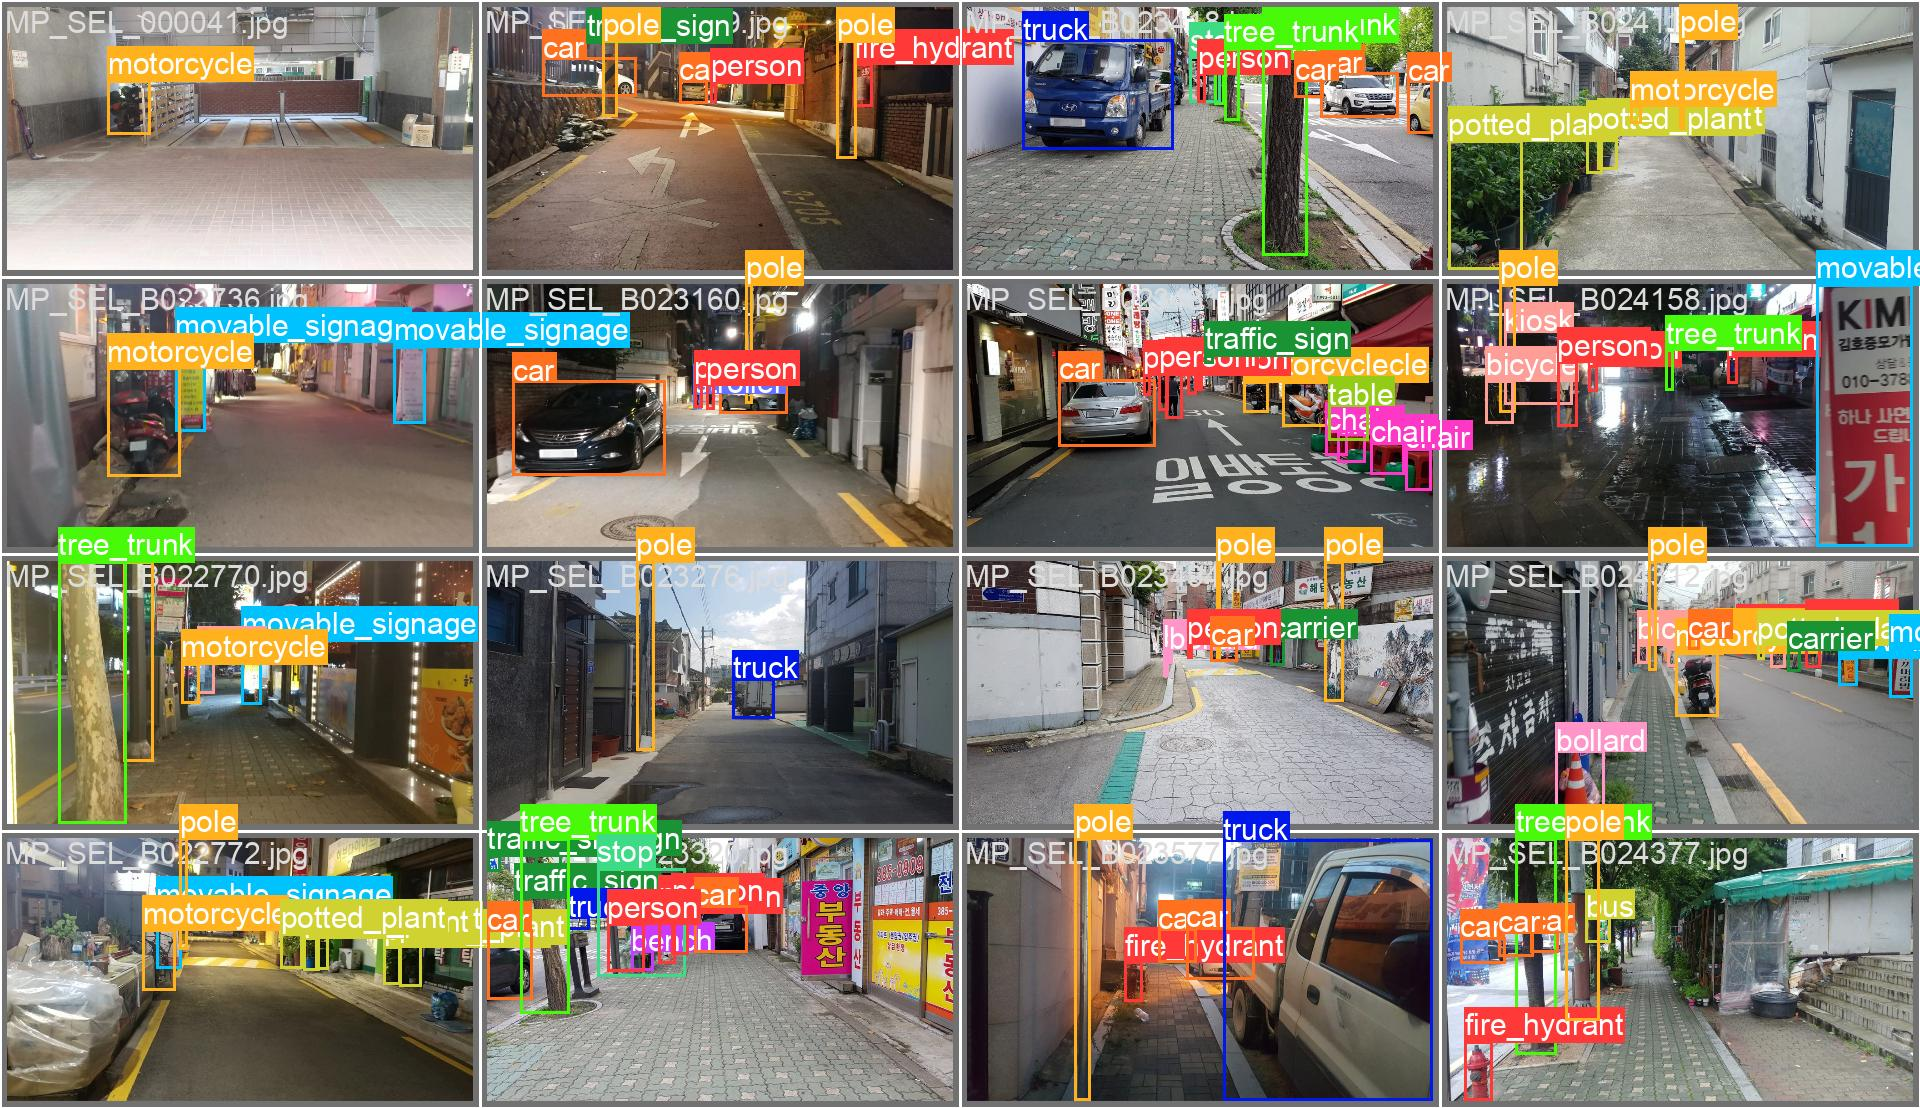

In [ ]:
Image(filename='/content/yolov5/runs/train/sc_results/val_batch0_labels.jpg',width=1000)

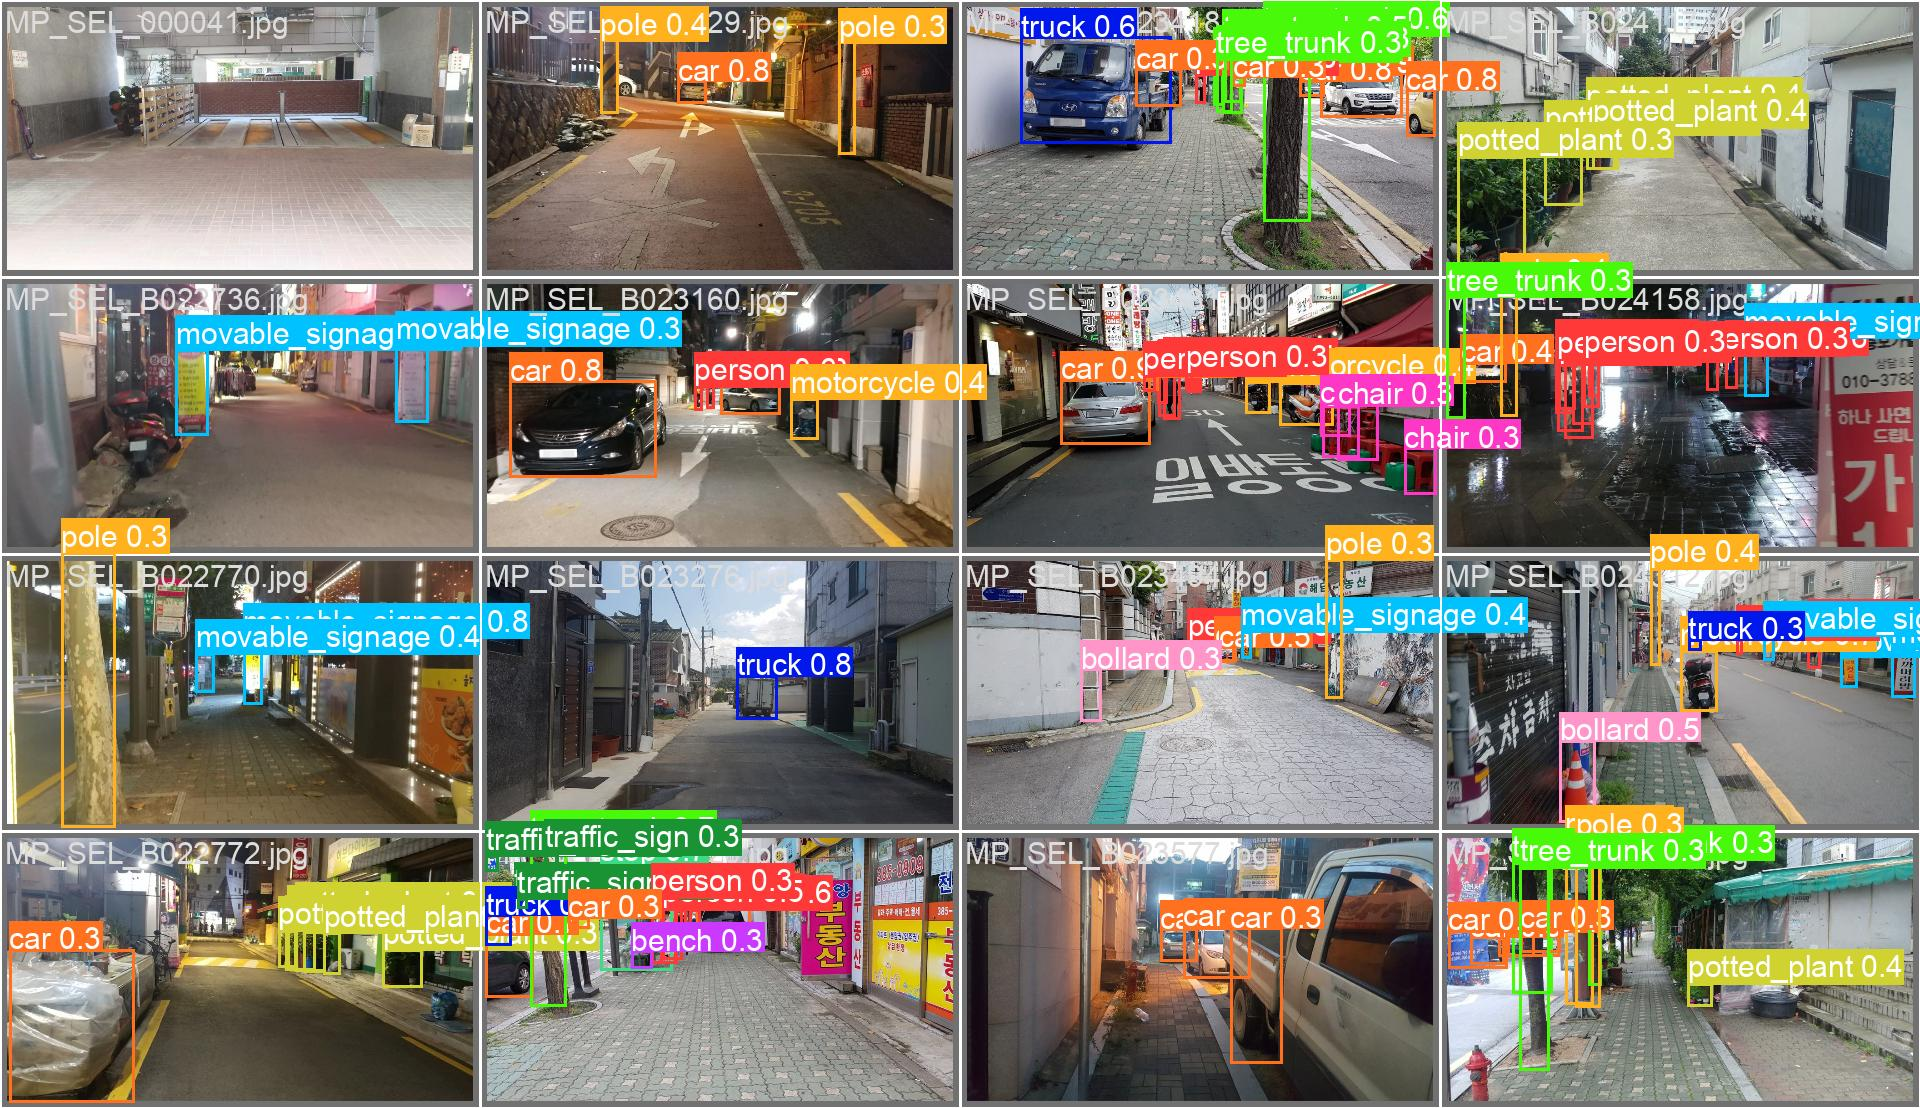

In [ ]:
Image(filename='/content/yolov5/runs/train/sc_results/val_batch0_pred.jpg',width=1000)

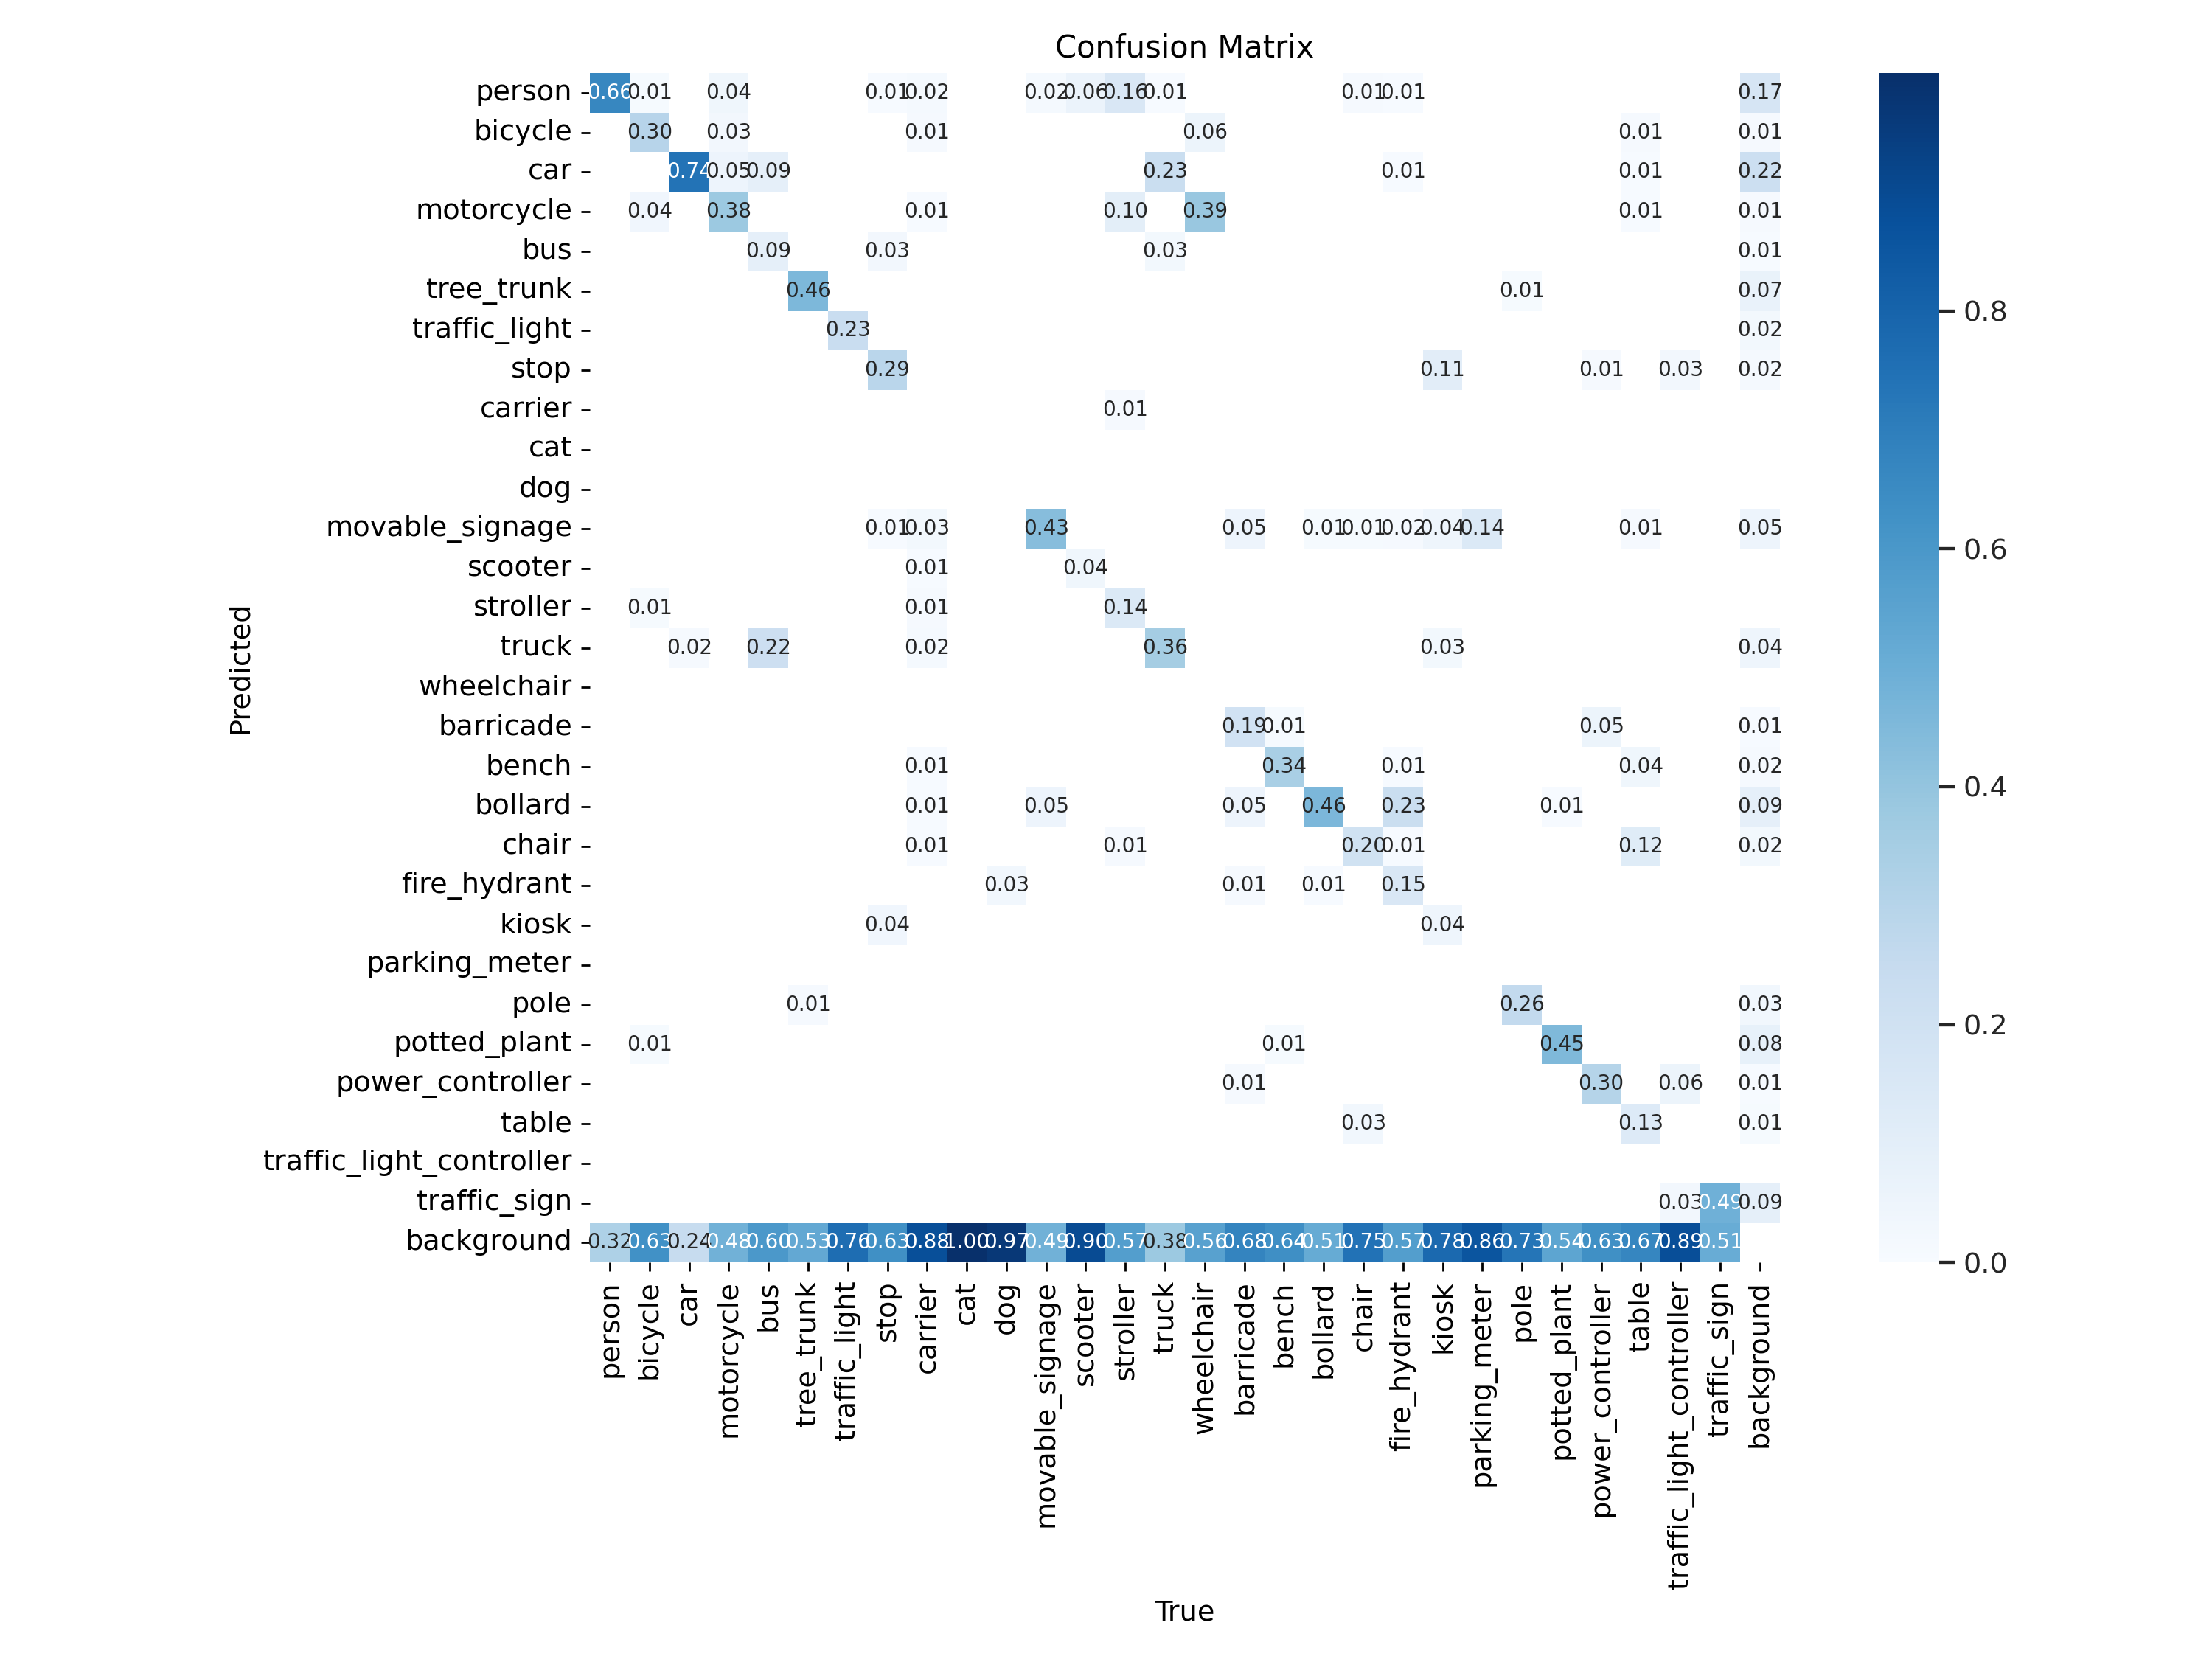

In [ ]:
Image(filename='/content/yolov5/runs/train/sc_results/confusion_matrix.png',width=1000)

In [ ]:
# 모델 내보내기
%mkdir /content/drive/MyDrive/kdt_231026/m8_vision/pothole
%cp /content/yolov5/runs/train/pothole_results/weights/best.pt /content/drive/MyDrive/kdt_231026/m8_vision/pothole

cp: cannot stat '/content/yolov5/runs/train/pothole_results/weights/best.pt': No such file or directory


In [ ]:
import shutil

source_folder = '/content/yolov5/runs/train/sc_results/weights'
destination_folder = '/content/drive/MyDrive/kdt_231026/project/data1/yolov5n_epoch20'

# 폴더 전체를 복사
shutil.copytree(source_folder, destination_folder)

'/content/drive/MyDrive/kdt_231026/project/data1/yolov5n_epoch20'

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
results = model.predict(source='/content/data/test/images', save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1126 /content/data/test/images/MP_SEL_000145.jpg: 384x640 10 cars, 80.5ms
image 2/1126 /content/data/test/images/MP_SEL_000283.jpg: 384x640 (no detections), 8.1ms
image 3/1126 /content/data/test/images/MP_SEL_000347.jpg: 384x640 4 cars, 3 chairs, 7.4ms
image 4/1126 /content/data/test/images/MP_SEL_000392.jpg: 384x640 1 bottle, 7.6ms
image 5/1126 /content/data/test/images/MP_SEL_000496.jpg: 384x640 1 car, 1 fire hydrant, 1 potted plant, 7.6ms
im

In [ ]:
print(type(results),len(results))

<class 'list'> 1126


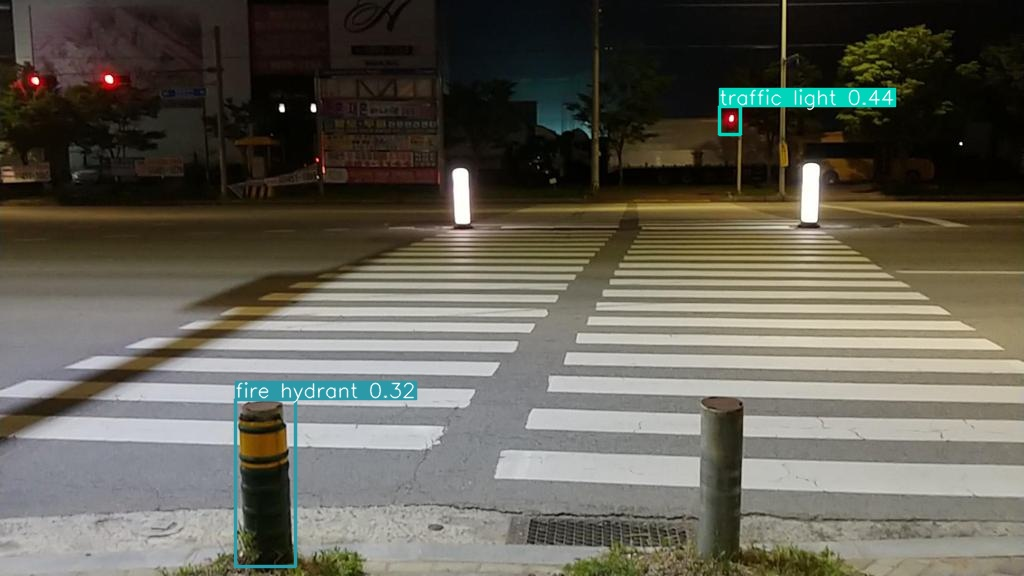

In [ ]:
import glob
import random
from IPython.display import Image, display

# test 데이터는 실제랑 비슷하게 한다고 검출되는 것이 거의 없는 이미지들로 골라놓았다고 한다.
image_name = random.choice(glob.glob('/content/yolov5/runs/detect/predict/*.jpg')) # test 한 results 랜덤으로 뽑기
display(Image(filename=image_name,width=1000))